In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: ignored

In [3]:
df = pd.read_csv('day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [6]:
df.pop('instant')
df.pop('dteday')

df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


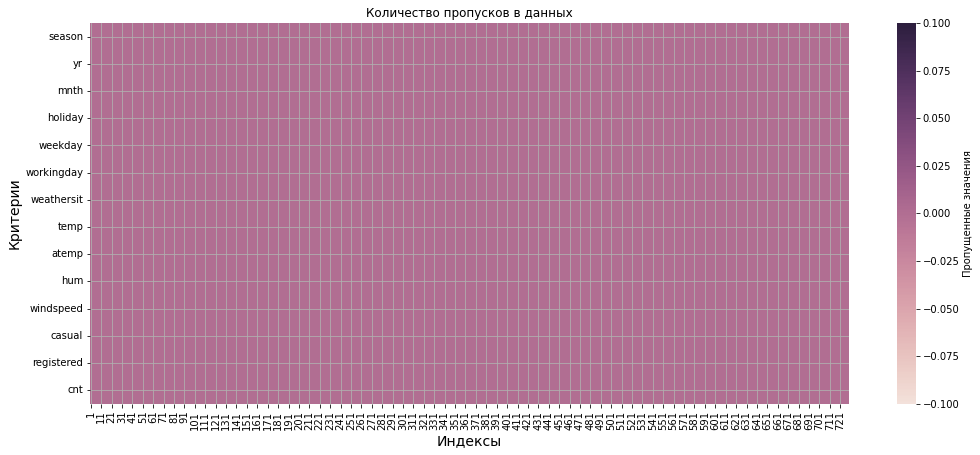

In [7]:
print(df.isna().sum())
plt.figure(figsize=(17,7))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.heatmap(df.isna().transpose(), cmap=cmap, cbar_kws={'label': 'Пропущенные значения'})
plt.xlabel("Индексы", fontsize=14)  
plt.ylabel("Критерии", fontsize=14)
plt.title("Количество пропусков в данных")
plt.grid()
plt.show()

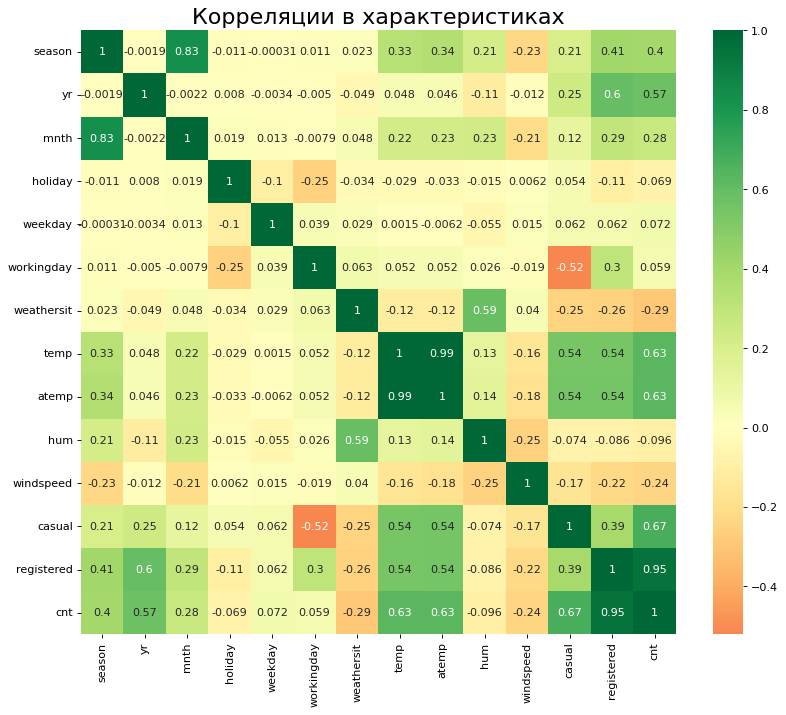

In [8]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()

In [10]:
y = df['cnt']
x = df.drop(columns='cnt')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
w0 = model.intercept_
w1 = model.coef_
print(w0, w1)

-3.637978807091713e-12 [-4.02678225e-13 -2.88657986e-15  1.74244300e-14 -4.98039521e-13
  4.97286254e-14 -6.90991755e-13  2.18465264e-13  3.33535283e-14
  2.61951918e-14  1.01221115e-15 -9.27860219e-15  1.00000000e+00
  1.00000000e+00]


In [13]:
ans = str(w0)
for i in range(8):
  ans = ans + ' + ' + str(w1[i]) + f' * x{i+1}'
print(ans)

-3.637978807091713e-12 + -4.0267822460633795e-13 * x1 + -2.886579864025407e-15 * x2 + 1.742442995444904e-14 * x3 + -4.980395211874372e-13 * x4 + 4.972862543639275e-14 * x5 + -6.909917550526699e-13 * x6 + 2.1846526391850092e-13 * x7 + 3.335352827260607e-14 * x8


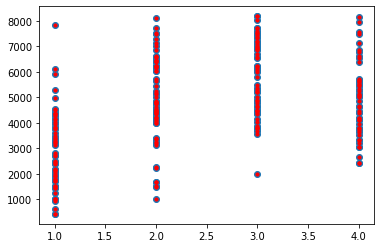

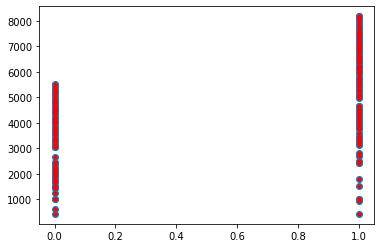

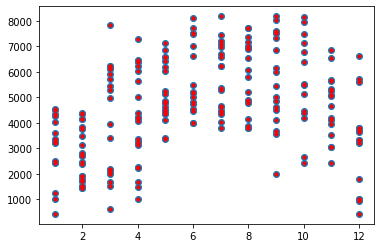

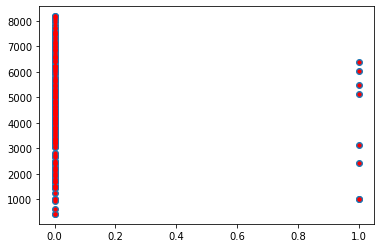

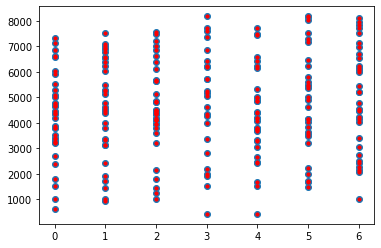

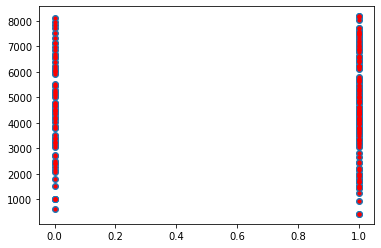

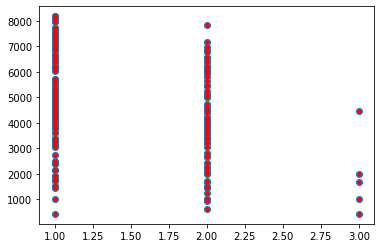

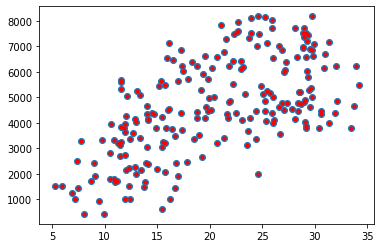

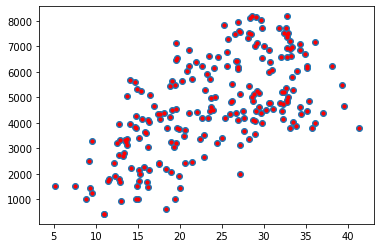

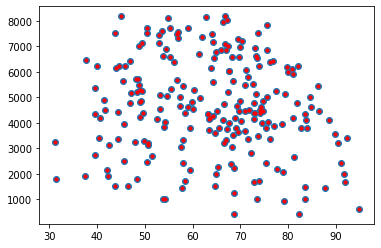

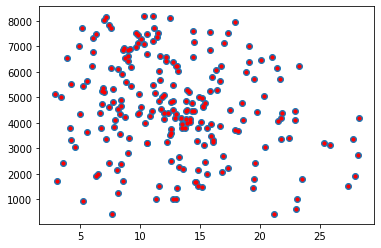

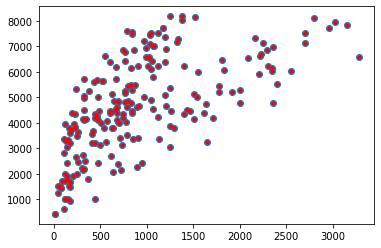

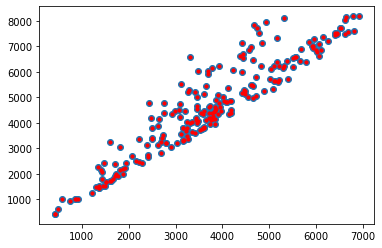

In [14]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
for col in X_test.columns:
  plt.scatter(X_test[col], y_test)
  plt.scatter(X_test[col], y_pred, color='red', s=10)
  plt.show()

In [15]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 1.0724977476386244e-12
Mean Squared Error: 1.9464062637204e-24
R2 score: 1.0


In [ ]:
Средний квадрат ошибки и средний модуль ошибки слишком малы, а r2 score - 1, значит обученная модель очень хорошо работает.